#**MLP**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file into a pandas DataFrame
df = pd.read_csv('/content/3_sections_same2.csv')


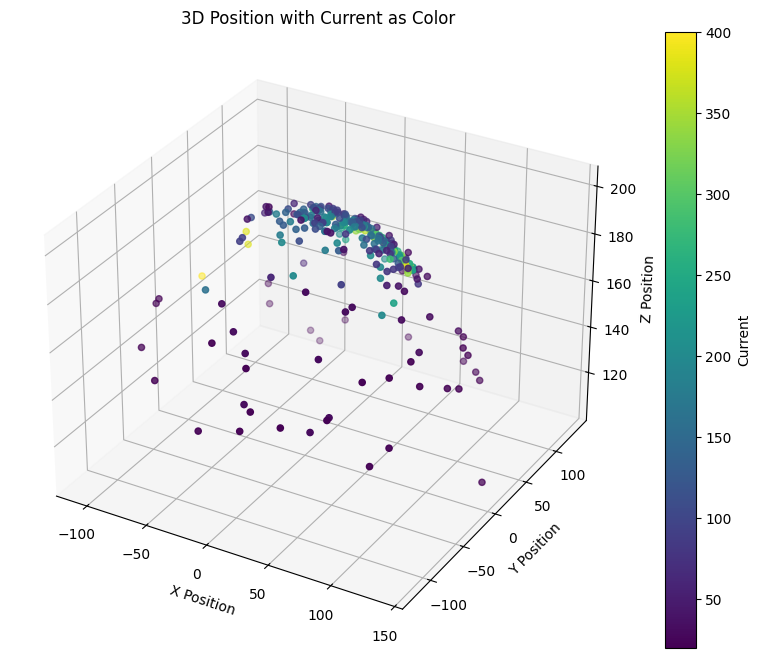

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with X, Y, Z positions, colored by current
sc = ax.scatter(df['x'], df['y'], df['z'], c=df['current'], cmap='viridis')

ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')
plt.title('3D Position with Current as Color')

# Add colorbar
plt.colorbar(sc, label="Current")

plt.show()


In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Features and target
features = df[['M1', 'M2', 'M3','M4', 'M5', 'M6','M7', 'M8', 'M9','z']]
target = df['current']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [15]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping  # Import EarlyStopping

# Define the desired output range
output_min = 20
output_max = 350

# Define the TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Create an EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',    # Monitor the validation loss
    patience=10,           # Stop after 10 epochs with no improvement
    restore_best_weights=True,  # Restore the model with the best weights after early stopping
    verbose=1              # Display a message when early stopping is triggered
)

# Train the model with early stopping
model.fit(
    X_train, y_train,
    epochs=400,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=2,
    callbacks=[early_stopping]  # Pass the early stopping callback
)

# Predict on the test set
y_test_pred_scaled = model.predict(X_test)
y_train_pred_scaled = model.predict(X_train)

# Evaluate the model
test_mse = mean_squared_error(y_test, y_test_pred_scaled)
test_r2 = r2_score(y_test, y_test_pred_scaled)

train_mse = mean_squared_error(y_train, y_train_pred_scaled)
train_r2 = r2_score(y_train, y_train_pred_scaled)

# Print the results for training and test sets
print(f"Optimized Model Training MSE: {train_mse}")
print(f"Optimized Model Training R² Score: {train_r2}")
print(f"Optimized Model Test MSE: {test_mse}")
print(f"Optimized Model Test R² Score: {test_r2}")


Epoch 1/400


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 - 1s - 132ms/step - loss: 32388.4219 - val_loss: 29873.6289
Epoch 2/400
8/8 - 0s - 7ms/step - loss: 32142.8613 - val_loss: 29628.8633
Epoch 3/400
8/8 - 0s - 7ms/step - loss: 31853.1738 - val_loss: 29324.9531
Epoch 4/400
8/8 - 0s - 11ms/step - loss: 31490.2246 - val_loss: 28940.5156
Epoch 5/400
8/8 - 0s - 14ms/step - loss: 31019.6641 - val_loss: 28459.2227
Epoch 6/400
8/8 - 0s - 16ms/step - loss: 30432.9297 - val_loss: 27858.5098
Epoch 7/400
8/8 - 0s - 14ms/step - loss: 29709.6895 - val_loss: 27115.9668
Epoch 8/400
8/8 - 0s - 13ms/step - loss: 28804.1211 - val_loss: 26217.0098
Epoch 9/400
8/8 - 0s - 18ms/step - loss: 27710.1074 - val_loss: 25146.0723
Epoch 10/400
8/8 - 0s - 15ms/step - loss: 26448.5059 - val_loss: 23893.7539
Epoch 11/400
8/8 - 0s - 20ms/step - loss: 24939.5156 - val_loss: 22475.4766
Epoch 12/400
8/8 - 0s - 16ms/step - loss: 23260.8828 - val_loss: 20909.5000
Epoch 13/400
8/8 - 0s - 17ms/step - loss: 21407.0957 - val_loss: 19216.1895
Epoch 14/400
8/8 - 0s - 19ms/step 

In [14]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features (important for MLP)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'early_stopping': [True],  # Enable early stopping
    'n_iter_no_change': [10],  # Number of iterations with no improvement before stopping
}

# Use GridSearchCV to search for the best parameters
mlp = MLPRegressor(max_iter=1000, random_state=42, validation_fraction=0.1, n_iter_no_change=10, early_stopping=True)
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Use the best estimator to make predictions on both training and test sets
best_mlp = grid_search.best_estimator_

# Predict on the test set
y_test_pred = best_mlp.predict(X_test)

# Predict on the training set
y_train_pred = best_mlp.predict(X_train)

# Evaluate the optimized model on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Evaluate the optimized model on the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Print the results for training and test sets
print(f"Optimized MLP Training MSE: {train_mse}")
print(f"Optimized MLP Training R² Score: {train_r2}")
print(f"Optimized MLP Test MSE: {test_mse}")
print(f"Optimized MLP Test R² Score: {test_r2}")


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'activation': 'relu', 'alpha': 0.01, 'early_stopping': True, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'n_iter_no_change': 10, 'solver': 'lbfgs'}
Optimized MLP Training MSE: 0.09362840644815705
Optimized MLP Training R² Score: 0.9999908420980209
Optimized MLP Test MSE: 690.3007544643272
Optimized MLP Test R² Score: 0.9330496693463237


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [16]:
model.save('mlp_multiple5.keras')

## results

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file into a pandas DataFrame
df = pd.read_csv('/content/static_results_multiple4.csv')
df=df.head(30)


In [ ]:
np.mean(df['response'])

0.6729751181818185

In [19]:
import numpy as np

# Assuming 'df' is your dataframe, calculate statistics for each column
#columns = ['vz', 'vx', 'vy', 'vM1', 'vM2', 'vM3', ]
columns = ['vz', 'vx', 'vy', 'vM1', 'vM2', 'vM3','vM4','vM5', 'vM6','vM7','vM8','vM9',      ]

# Dictionary to store statistics
statistics = {}

for col in columns:
    data = df[col]

    # Calculate the 5-number summary
    min_val = np.min(data)
    q1 = np.percentile(data, 25)
    median = np.median(data)
    q3 = np.percentile(data, 75)
    max_val = np.max(data)

    # IQR (Inter-Quartile Range)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Find outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    # Store in dictionary
    statistics[col] = {
        'min': min_val,
        'q1': q1,
        'median': median,
        'q3': q3,
        'max': max_val,
        'outliers': outliers
    }

# Display the statistics
for col, stats in statistics.items():
    print(f"{col} statistics:")
    for stat, value in stats.items():
        print(f"  {stat}: {value}")
    print()


vz statistics:
  min: 0.0
  q1: 9.03283163925201e-06
  median: 0.0041981309817886
  q3: 0.031838677978215
  max: 17.4493655533593
  outliers: 16     0.270108
21    17.449366
23     0.104698
24     0.444978
27     2.667974
28     0.531797
Name: vz, dtype: float64

vx statistics:
  min: 0.0
  q1: 2.35556746687083e-05
  median: 0.0051879399901185
  q3: 0.11759619981307
  max: 7.99564233414404
  outliers: 12    0.500445
20    2.177852
21    7.995642
23    0.874846
24    1.025283
Name: vx, dtype: float64

vy statistics:
  min: 0.0
  q1: 1.84594172404263e-05
  median: 0.0058134534332634
  q3: 0.260893205638176
  max: 26.5191557673005
  outliers: 16     2.456509
21     4.299572
23     2.314158
24     0.959515
27    26.519156
28     0.727103
Name: vy, dtype: float64

vM1 statistics:
  min: 0.0
  q1: 0.0
  median: 9.4169858067146e-06
  q3: 0.0014577494028792
  max: 6.26270237525156
  outliers: 12    0.174829
20    0.661333
21    6.262702
23    0.249995
24    0.379252
25    0.053514
27    1.4761

In [20]:
# Using describe() to get the summary statistics for each variable
summary_stats = df[columns].describe().transpose()

# Add mean separately (it's already included in describe() by default)
summary_stats['Mean'] = df[columns].mean()

# Display the summary statistics
print(summary_stats)


     count      mean       std  min       25%       50%       75%        max  \
vz    29.0  0.746354  3.251448  0.0  0.000009  0.004198  0.031839  17.449366   
vx    29.0  0.453394  1.521696  0.0  0.000024  0.005188  0.117596   7.995642   
vy    29.0  1.316424  4.944402  0.0  0.000018  0.005813  0.260893  26.519156   
vM1   29.0  0.319304  1.182021  0.0  0.000000  0.000009  0.001458   6.262702   
vM2   29.0  0.173750  0.522677  0.0  0.000000  0.000085  0.030596   2.491066   
vM3   29.0  0.349205  1.681656  0.0  0.000008  0.000075  0.011536   9.080410   
vM4   29.0  0.360698  1.046635  0.0  0.000000  0.000009  0.007383   4.093451   
vM5   29.0  0.197839  0.471200  0.0  0.000000  0.000009  0.002290   1.713615   
vM6   29.0  0.806163  3.443605  0.0  0.000000  0.000009  0.000102  18.198774   
vM7   29.0  0.208389  0.744350  0.0  0.000000  0.000009  0.000113   3.830864   
vM8   29.0  1.150389  3.860391  0.0  0.000000  0.000009  0.000313  18.740932   
vM9   29.0  0.240357  0.681059  0.0  0.0